In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("D:\Projects\ML projects\Stock Price Prediction\Data\GOOG.csv")
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [5]:
print("Shape of the Data : ",df.shape)

Shape of the Data :  (1258, 14)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [7]:
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%d-%m-%Y')
df['date'].dtype

dtype('O')

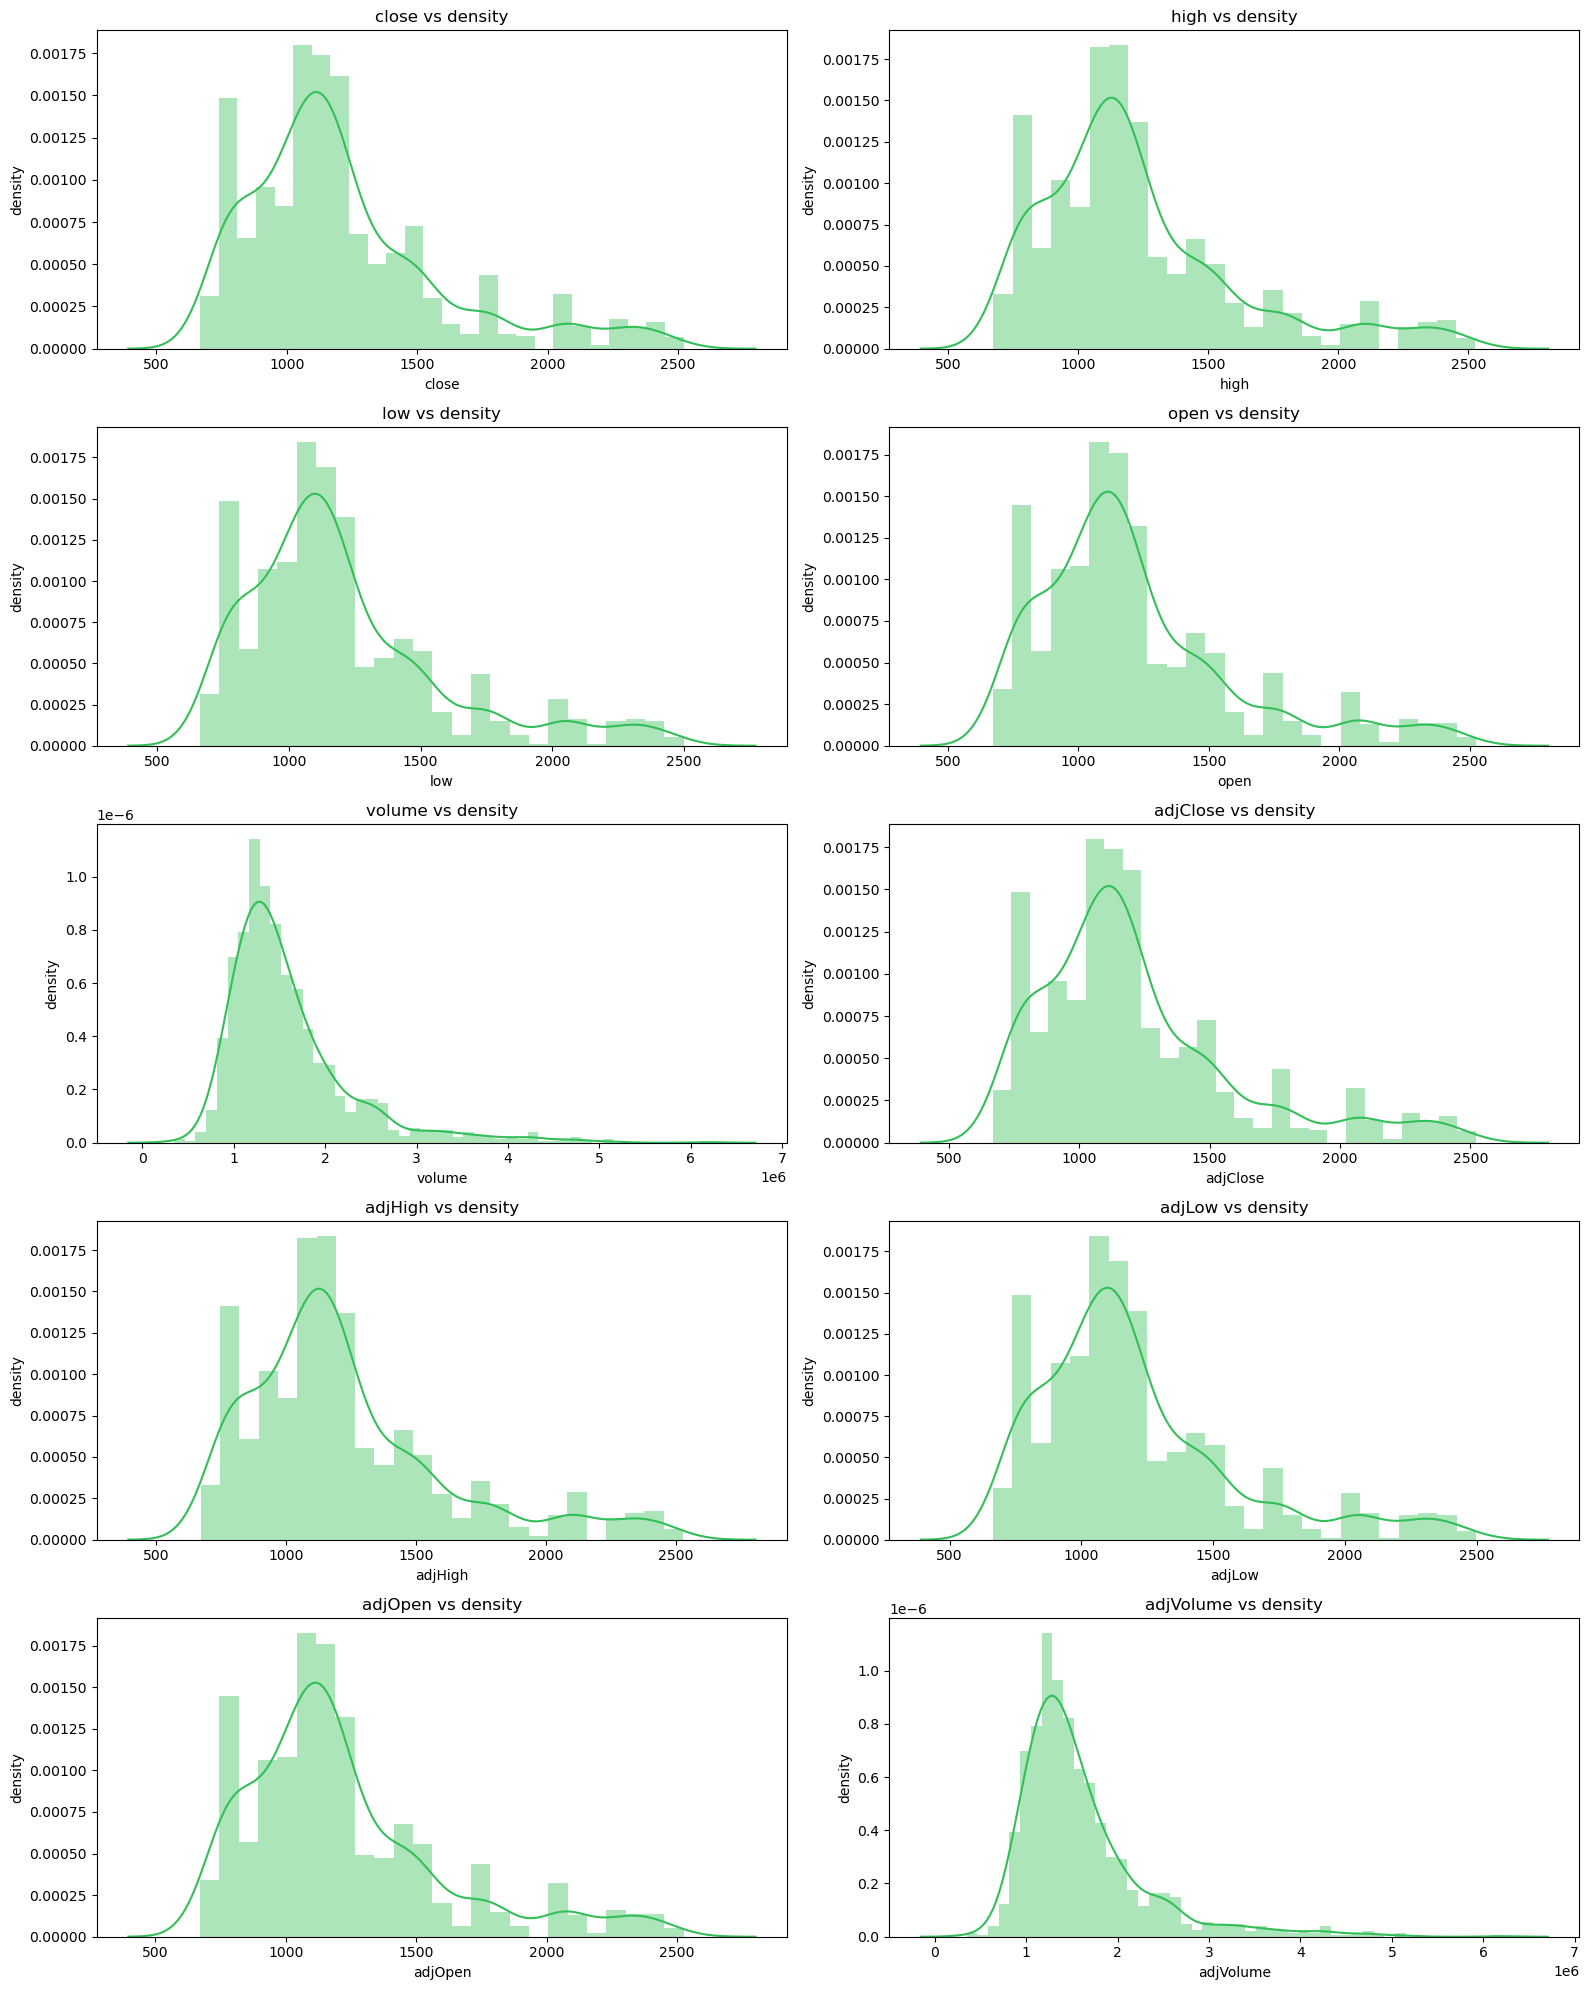

In [10]:
cols = ['close','high','low','open','volume',
 'adjClose','adjHigh','adjLow','adjOpen','adjVolume']


sns.set_palette("PiYG")
plt.figure(figsize=(16,20))

for idx , col in enumerate(cols):
    plt.subplot(5,2,idx+1)
    sns.distplot(df ,x = df[col],color ="#32bf57")
    plt.title(f"{col} vs density")
    plt.xlabel(col)
    plt.ylabel("density")
plt.tight_layout()
plt.show()

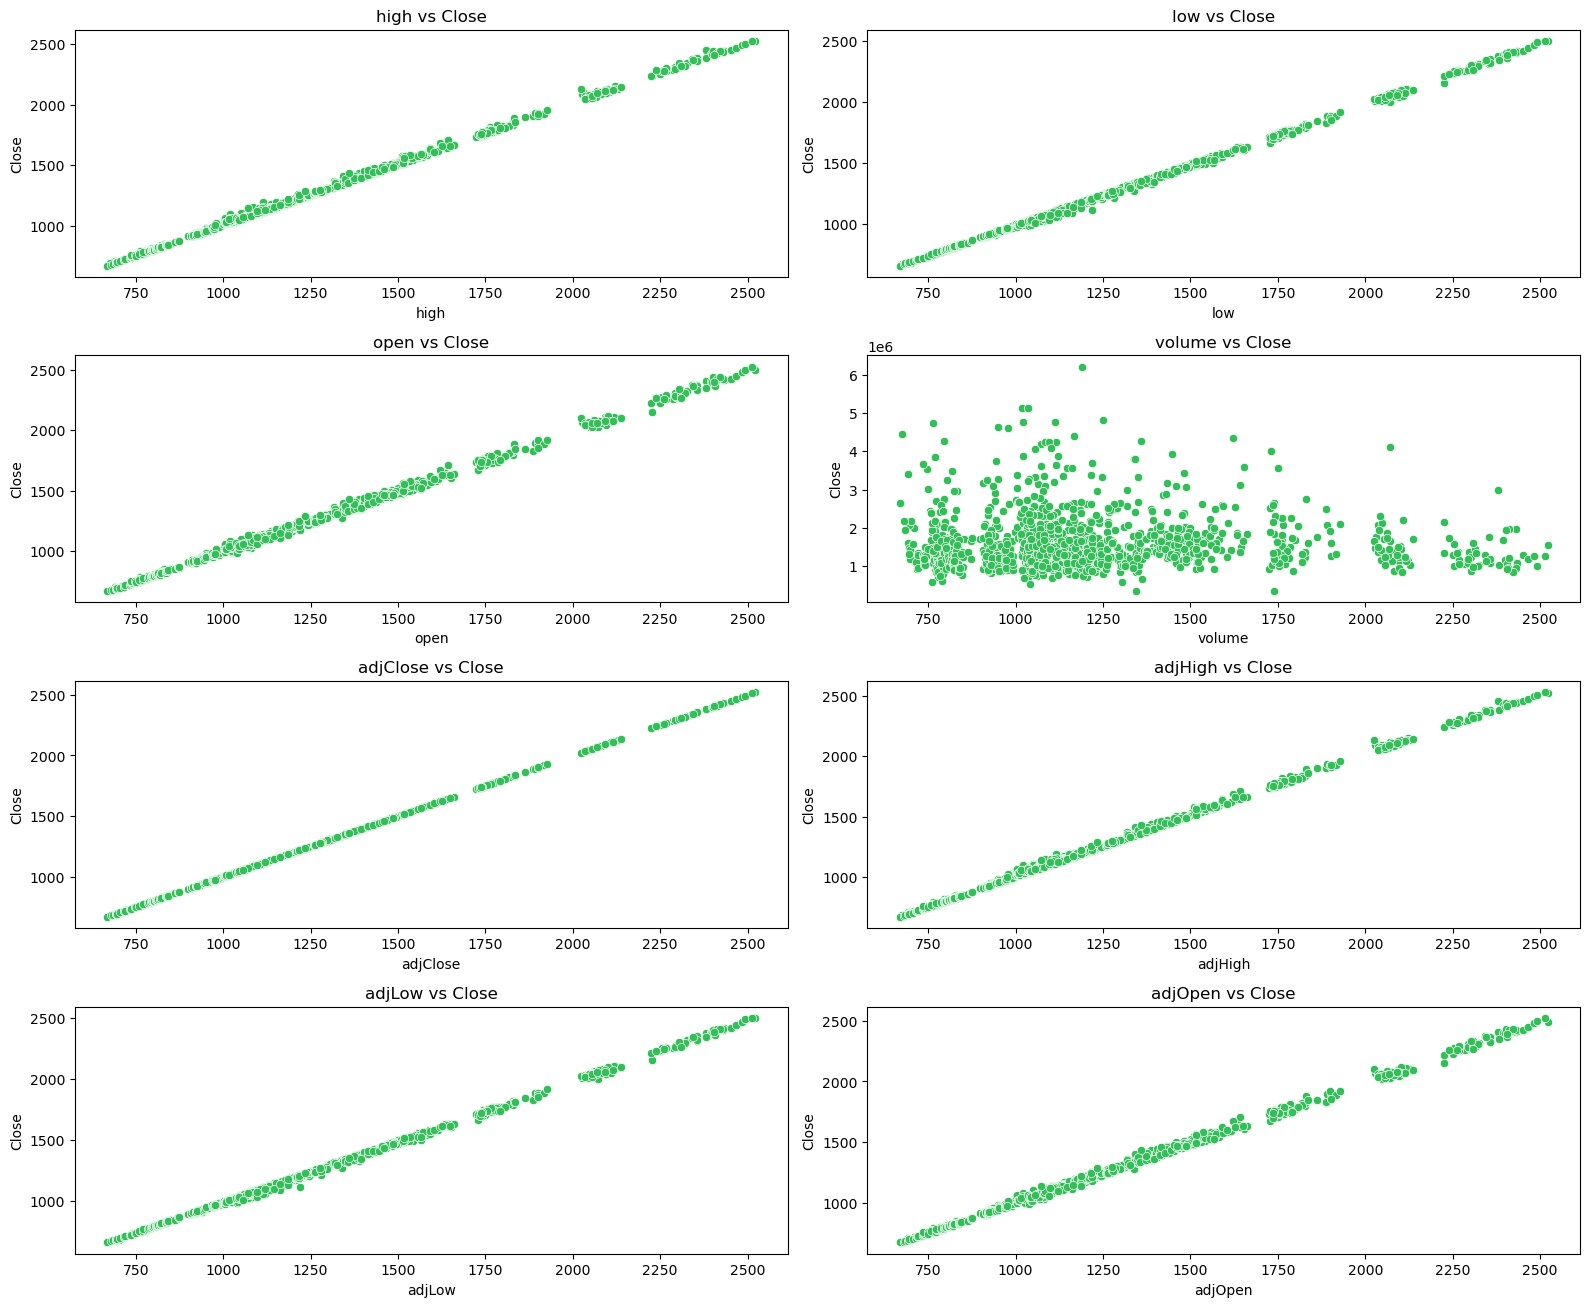

In [11]:
cols = ['high','low','open','volume',
 'adjClose','adjHigh','adjLow','adjOpen']


sns.set_palette("PiYG")
plt.figure(figsize=(16,16))

for idx , col in enumerate(cols):
    plt.subplot(5,2,idx+1)
    sns.scatterplot(x = df['close'],y=df[col],color ="#32bf57")
    plt.title(f"{col} vs Close")
    plt.xlabel(col)
    plt.ylabel("Close")
plt.tight_layout()
plt.show()

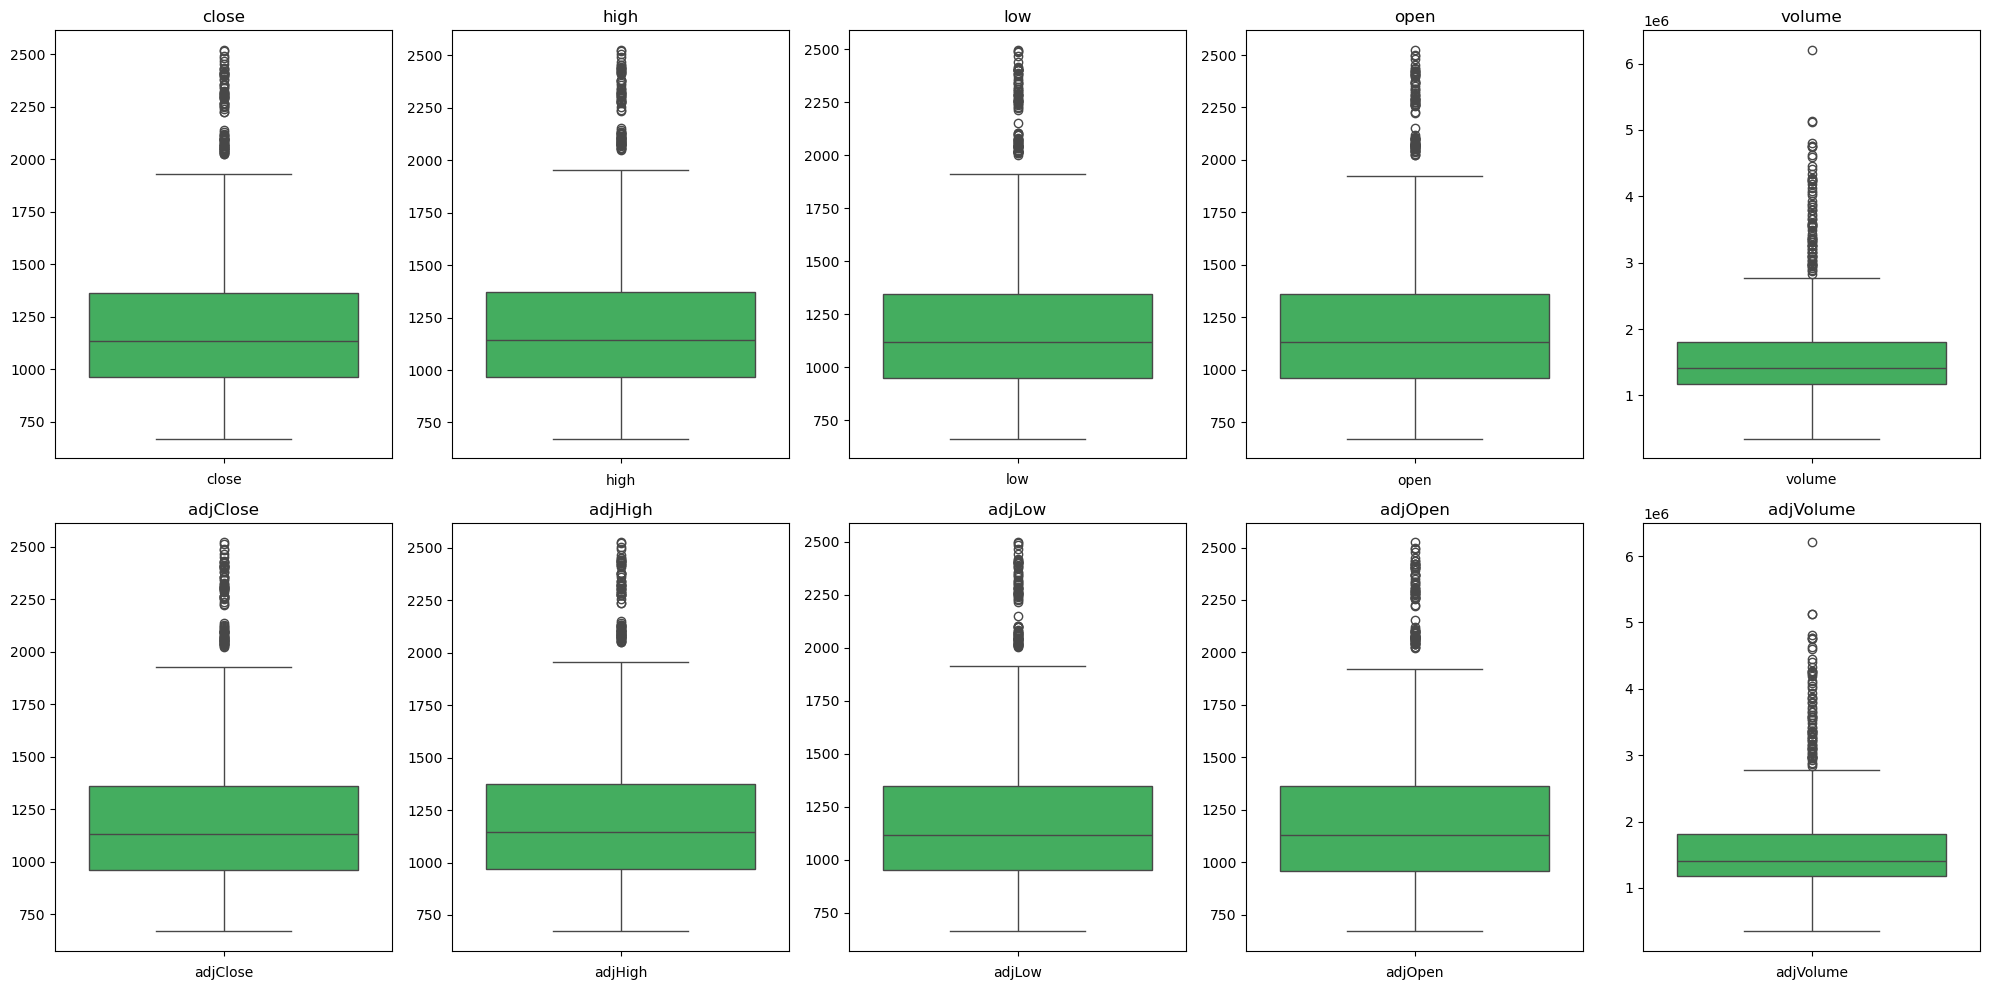

In [12]:
cols = ['close','high','low','open','volume',
 'adjClose','adjHigh','adjLow','adjOpen','adjVolume']

sns.set_palette("PiYG")
plt.figure(figsize=(20,10))

for idx , col in enumerate(cols):
    plt.subplot(2,5,idx+1)
    sns.boxplot(y=df[col],color ="#32bf57")
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("")
plt.tight_layout()
plt.show()


In [13]:
dff = df.drop(columns=['date','divCash', 'splitFactor'])
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symbol     1258 non-null   object 
 1   close      1258 non-null   float64
 2   high       1258 non-null   float64
 3   low        1258 non-null   float64
 4   open       1258 non-null   float64
 5   volume     1258 non-null   int64  
 6   adjClose   1258 non-null   float64
 7   adjHigh    1258 non-null   float64
 8   adjLow     1258 non-null   float64
 9   adjOpen    1258 non-null   float64
 10  adjVolume  1258 non-null   int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 108.2+ KB


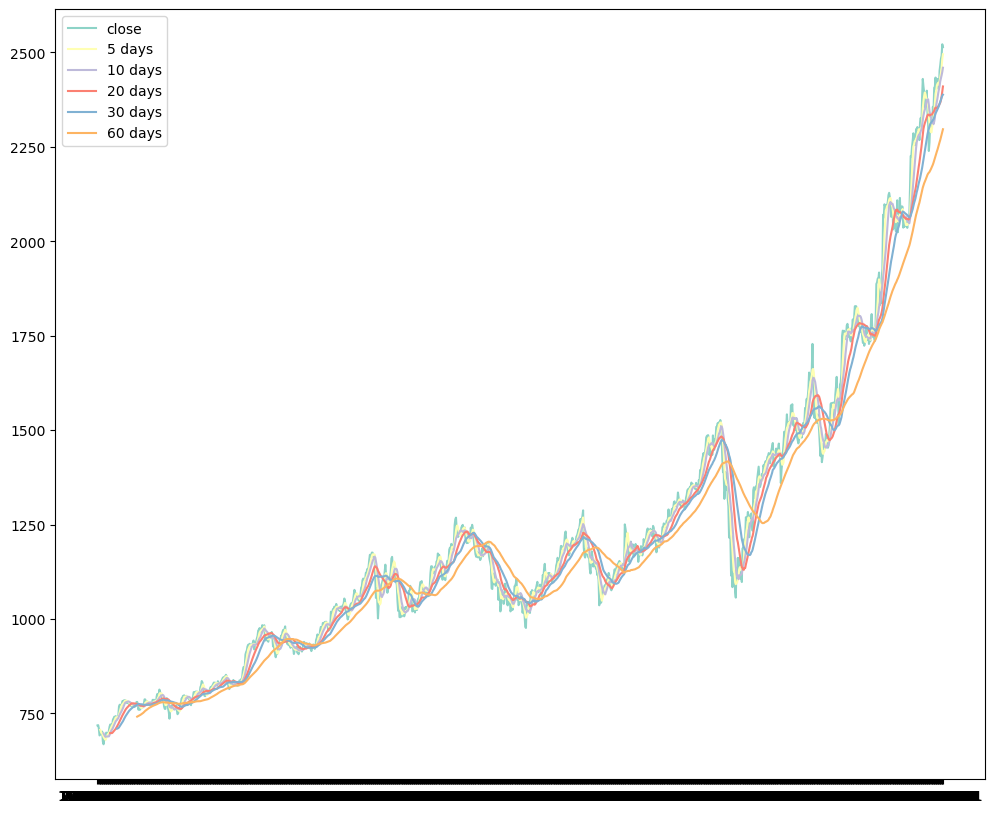

In [14]:
df1 = df.copy()

ma_days = [5,10,20,30,60]

for MA in ma_days:
    col = f"MA in {MA} days"
    df1[col] = df1['close'].rolling(MA).mean()

sns.set_palette("Set3")
plt.figure(figsize=(12,10))

plt.plot(df1['date'],df1['close'],label='close')
plt.plot(df1['date'],df1['MA in 5 days'],label= '5 days')
plt.plot(df1['date'],df1['MA in 10 days'],label= '10 days')
plt.plot(df1['date'],df1['MA in 20 days'],label= '20 days')
plt.plot(df1['date'],df1['MA in 30 days'],label= '30 days')
plt.plot(df1['date'],df1['MA in 60 days'],label= '60 days')
plt.legend()
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler 
dff = dff[['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume']]
scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dff)

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

torch.manual_seed(42)
seq_length = 60
input_size = 10



def create_sequences(data,sequence_length):
    sequences , target = [] , []

    for i in range(len(data)-sequence_length):
        sequences.append(data[i:i+sequence_length])
        target.append(data[i+seq_length,0])
    return np.array(sequences,dtype =np.float32) , np.array(target , dtype= np.float32)

x , y = create_sequences(scaled_data,seq_length)


train_size = int(len(x)*0.8)

x_train , x_test = x[:train_size] , x[train_size:]
y_train , y_test = y[:train_size] , y[train_size:]
print(x_train.shape , x_test.shape,y_train.shape , y_test.shape)


(958, 60, 10) (240, 60, 10) (958,) (240,)


In [28]:
class StockDataset():
    def __init__(self,x,y):
        self.x = torch.tensor(x)
        self.y = torch.tensor(y)

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self,idx):
        return self.x[idx] , self.y[idx]
    

train_dataset = StockDataset(x_train,y_train)
test_dataset = StockDataset(x_test,y_test)

train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False)


In [29]:
class RNN(nn.Module):
    def __init__(self,input_size ,hidden_size,num_layers):
        super(RNN,self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size,hidden_size,num_layers ,batch_first = True)
        self.fc = nn.Linear(hidden_size,1)

    def forward(self,x):
        h0 = torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(x.device)
        out , _ = self.rnn(x,h0)
        out = self.fc(out[:,-1,:])
        return out

In [30]:
input_size = 10
hidden_size = 64
num_layers = 3

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = RNN(input_size ,hidden_size ,num_layers).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr =0.001)

cpu


In [31]:
num_epochs = 40

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for x_batch , y_batch in train_loader:
        x_batch , y_batch = x_batch.to(device) , y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(x_batch)
        loss = criterion(outputs,y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch : [{epoch+1}/{num_epochs}] , loss : {avg_loss:.5f}")

Epoch : [1/40] , loss : 0.0137
Epoch : [2/40] , loss : 0.0007
Epoch : [3/40] , loss : 0.0003
Epoch : [4/40] , loss : 0.0002
Epoch : [5/40] , loss : 0.0002
Epoch : [6/40] , loss : 0.0002
Epoch : [7/40] , loss : 0.0002
Epoch : [8/40] , loss : 0.0002
Epoch : [9/40] , loss : 0.0002
Epoch : [10/40] , loss : 0.0002
Epoch : [11/40] , loss : 0.0002
Epoch : [12/40] , loss : 0.0002
Epoch : [13/40] , loss : 0.0002
Epoch : [14/40] , loss : 0.0002
Epoch : [15/40] , loss : 0.0002
Epoch : [16/40] , loss : 0.0002
Epoch : [17/40] , loss : 0.0002
Epoch : [18/40] , loss : 0.0001
Epoch : [19/40] , loss : 0.0001
Epoch : [20/40] , loss : 0.0002
Epoch : [21/40] , loss : 0.0002
Epoch : [22/40] , loss : 0.0001
Epoch : [23/40] , loss : 0.0001
Epoch : [24/40] , loss : 0.0001
Epoch : [25/40] , loss : 0.0001
Epoch : [26/40] , loss : 0.0001
Epoch : [27/40] , loss : 0.0001
Epoch : [28/40] , loss : 0.0001
Epoch : [29/40] , loss : 0.0001
Epoch : [30/40] , loss : 0.0001
Epoch : [31/40] , loss : 0.0001
Epoch : [32/40] ,

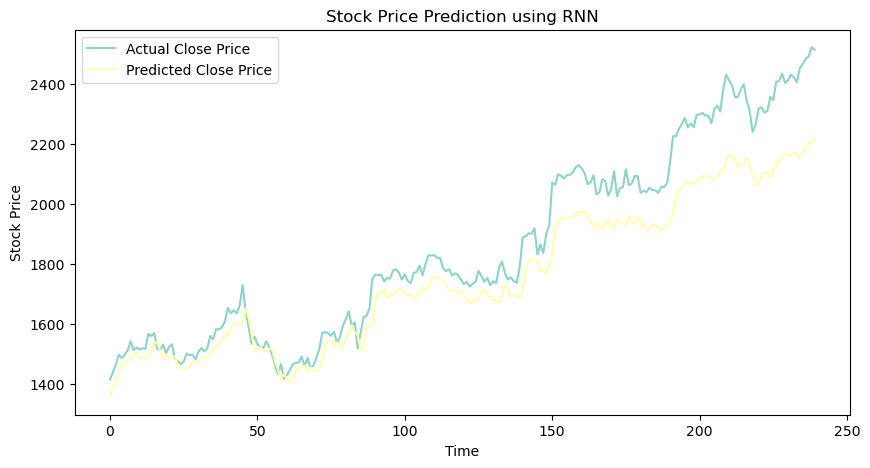

In [32]:
def evaluate(model, dataloader):
    model.eval()
    predictions, actuals = [], []

    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(y_batch.cpu().numpy())

    return np.array(predictions), np.array(actuals)

preds, actuals = evaluate(model, test_loader)

preds = scaler.inverse_transform(np.column_stack((preds, np.zeros((len(preds), 9)))))[:, 0]
actuals = scaler.inverse_transform(np.column_stack((actuals.reshape(-1, 1), np.zeros((len(actuals), 9)))))[:, 0]

plt.figure(figsize=(10, 5))
plt.plot(actuals, label="Actual Close Price")
plt.plot(preds, label="Predicted Close Price")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction using RNN")
plt.show()

In [22]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.shape[0]  
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)  
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)  

        lstm_out, _ = self.lstm(x, (h0, c0))
        return self.fc(lstm_out[:, -1, :])  


In [35]:
input_size = 10
hidden_size = 64
num_layers = 2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = LSTMModel(input_size ,hidden_size ,num_layers).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr =0.001)

cpu


In [ ]:
num_epochs = 40
import mlflow
import mlflow.pytorch
for epoch in range(num_epochs):
    
    model.train()
    total_loss = 0

    for x_batch , y_batch in train_loader:
        x_batch , y_batch = x_batch.to(device) , y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(x_batch)
        loss = criterion(outputs,y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch : [{epoch+1}/{num_epochs}] , loss : {avg_loss:.4f}")

Epoch : [1/40] , loss : 0.0226
Epoch : [2/40] , loss : 0.0021
Epoch : [3/40] , loss : 0.0004
Epoch : [4/40] , loss : 0.0004
Epoch : [5/40] , loss : 0.0003
Epoch : [6/40] , loss : 0.0003
Epoch : [7/40] , loss : 0.0003
Epoch : [8/40] , loss : 0.0003
Epoch : [9/40] , loss : 0.0003
Epoch : [10/40] , loss : 0.0003
Epoch : [11/40] , loss : 0.0002
Epoch : [12/40] , loss : 0.0003
Epoch : [13/40] , loss : 0.0002
Epoch : [14/40] , loss : 0.0002
Epoch : [15/40] , loss : 0.0002
Epoch : [16/40] , loss : 0.0002
Epoch : [17/40] , loss : 0.0002
Epoch : [18/40] , loss : 0.0002
Epoch : [19/40] , loss : 0.0002
Epoch : [20/40] , loss : 0.0002
Epoch : [21/40] , loss : 0.0002
Epoch : [22/40] , loss : 0.0002
Epoch : [23/40] , loss : 0.0002
Epoch : [24/40] , loss : 0.0002
Epoch : [25/40] , loss : 0.0002
Epoch : [26/40] , loss : 0.0002
Epoch : [27/40] , loss : 0.0002
Epoch : [28/40] , loss : 0.0002
Epoch : [29/40] , loss : 0.0002
Epoch : [30/40] , loss : 0.0002
Epoch : [31/40] , loss : 0.0002
Epoch : [32/40] ,

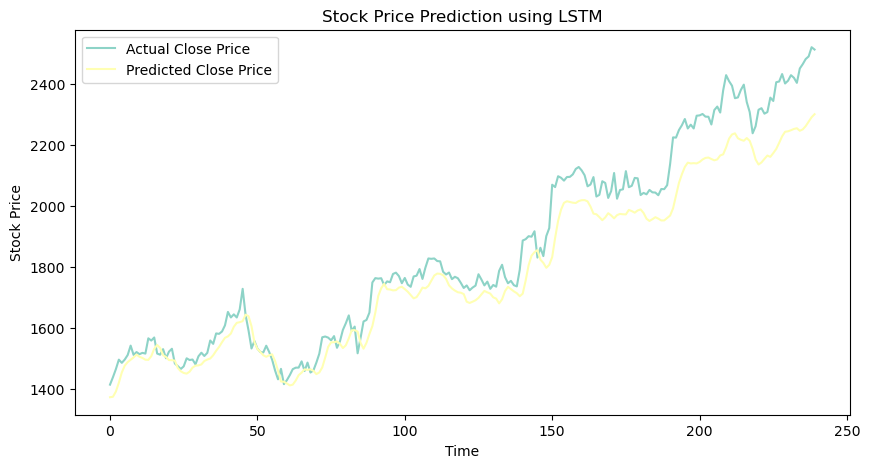

In [25]:
def evaluate(model, dataloader):
    model.eval()
    predictions, actuals = [], []

    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(y_batch.cpu().numpy())

    return np.array(predictions), np.array(actuals)

preds, actuals = evaluate(model, test_loader)

preds = scaler.inverse_transform(np.column_stack((preds, np.zeros((len(preds), 9)))))[:, 0]
actuals = scaler.inverse_transform(np.column_stack((actuals.reshape(-1, 1), np.zeros((len(actuals), 9)))))[:, 0]

plt.figure(figsize=(10, 5))
plt.plot(actuals, label="Actual Close Price")
plt.plot(preds, label="Predicted Close Price")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction using LSTM")
plt.show()

In [51]:
torch.save(model.state_dict(),"LSTM.pkl")